# Detect fake news using Supervised learning with NLP

### Import the neccessary libraries

In [34]:
# Basic libraries
import numpy as np
import pandas as pd
import itertools
import re
import string
import random
from textblob import TextBlob

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

# Import the NLTK module
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer

# Import all the neccessary modules from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

***
### Import the dataset

In [3]:
print('Loading dataset...')
data = pd.read_csv('data/fake_or_real_news.csv')
print('Done')

Loading dataset...
Done


Inspect the dataframe

In [7]:
print('Shape of the dataframe: {}'.format(data.shape))

Shape of the dataframe: (6335, 4)


In [9]:
data.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [10]:
# Set the index of the dataframe
data.set_index('Unnamed: 0')

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE


In [11]:
data.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### Extracting the training data

In [12]:
# Set into variable y the label
y = data.label

In [13]:
# Drop the label column from the dataframe
data.drop('label', axis=1)

,Unnamed: 0,title,text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...
...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene..."


In [15]:
# Make the trainning and the test set
X_train, X_test, y_train, y_test = train_test_split(data['text'], y, test_size=0.33, random_state=53)

***
### Building Vectorizer Classifiers

#### Building the CountVectorizer

In [17]:
# Initialize the countVectorizer
count_vec = CountVectorizer(stop_words='english')

# Fit and transform the trainning data
count_train = count_vec.fit_transform(X_train)

# Transform the test data
count_test = count_vec.transform(X_test)



#### Building the TfidfVectorizer

In [42]:
# Initialize the tfidf vectorizer
tfidf_vec = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the trainning data
tfidf_train = tfidf_vec.fit_transform(X_train)

# Transform the test data
tfidf_test = tfidf_vec.transform(X_test)

Information about the count_vectorizer and tfidf_vectorizer

In [21]:
print(tfidf_vec.get_feature_names()[-10:])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


In [22]:
print(count_vec.get_feature_names()[-10:])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


***
### Model compare: Count_Vectorizer vs Tf-idf Vectorizer using MultiNomial Naïve Bayes

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Tf-idf Vectorizer

In [36]:
# Use the classifier
clf_tfidf = MultinomialNB()

Accuracy using Tf-idf: 0.8565279770444764%
Confusion matrix, without normalization


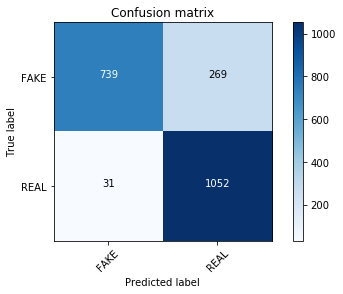

In [38]:
clf_tfidf.fit(tfidf_train, y_train)
pred_tfidf = clf_tfidf.predict(tfidf_test)
score_tfidf = accuracy_score(y_test, pred_tfidf)

# Print the accuracy score
print('Accuracy using Tf-idf: {}%'.format(score_tfidf))

# Calculate the confusion matrix
cm_tfidf = confusion_matrix(y_test, pred_tfidf, labels=['FAKE', 'REAL'])

# Plot the confusion matrix
plot_confusion_matrix(cm_tfidf, classes=['FAKE', 'REAL'])

#### Count_Vectorizer

In [39]:
# Use the classifier 
clf_countVec = MultinomialNB()

Accuracy using Tf-idf: 0.893352462936394%
Confusion matrix, without normalization


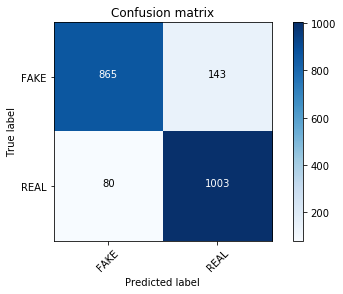

In [40]:
clf_countVec.fit(count_train, y_train)
pred_countVec = clf_countVec.predict(count_test)
score_countVec = accuracy_score(y_test, pred_countVec)

# Print the accuracy score
print('Accuracy using Tf-idf: {}%'.format(score_countVec))

# Calculate the confusion matrix
cm_countVec = confusion_matrix(y_test, pred_countVec, labels=['FAKE', 'REAL'])

# Plot the confusion matrix
plot_confusion_matrix(cm_countVec, classes=['FAKE', 'REAL'])